Create CNN and Model and Optimize it using Keras Tuner

In [ ]:
#!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)


In [ ]:
def build_model(hp):
  model=keras.Sequential([
     keras.layers.Conv2D(
         filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16 ),
         kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
         activation='relu',
         input_shape=(28,28,1)
     ),
     keras.layers.Conv2D(
         filters=hp.Int('conv_2_filter',min_value=32,max_value=128,step=16 ),
         kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
         activation='relu',
         input_shape=(28,28,1)
     ),
     keras.layers.Flatten(),
     keras.layers.Dense(
         units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
         activation='relu'
     ),
     keras.layers.Dense(10,activation='softmax')

  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
  )
  return model


In [ ]:
!pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.3 MB/s 


In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5, 
                          directory='output',
                          project_name='mnist_fashion')

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.859000027179718

Best val_accuracy So Far: 0.9056666493415833
Total elapsed time: 00h 03m 45s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 48)        1248      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 48)        57648     
                                                                 
 flatten (Flatten)           (None, 19200)             0         
                                                                 
 dense (Dense)               (None, 96)                1843296   
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 1,903,162
Trainable params: 1,903,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3 )

Epoch 4/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1825 - accuracy: 0.9312 - val_loss: 0.2758 - val_accuracy: 0.9053
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1472 - accuracy: 0.9450 - val_loss: 0.2682 - val_accuracy: 0.9120
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1172 - accuracy: 0.9559 - val_loss: 0.3077 - val_accuracy: 0.9108
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0925 - accuracy: 0.9655 - val_loss: 0.3358 - val_accuracy: 0.9117
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9731 - val_loss: 0.3356 - val_accuracy: 0.9133
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0603 - accuracy: 0.9779 - val_loss: 0.3860 - val_accuracy: 0.9078
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9822 - val_loss: 0.4450 - val_accuracy

In [ ]:
model.predict(np.expand_dims(test_images[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(test_images[0],axis=0)).round(2))

9

In [ ]:
test_labels[0]

9

In [ ]:
y_pred=model.predict(test_images).round(2)
y_pred


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.9113


[0.4430782198905945, 0.911300003528595]

In [ ]:
class_labels=['T-shirt/Top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]

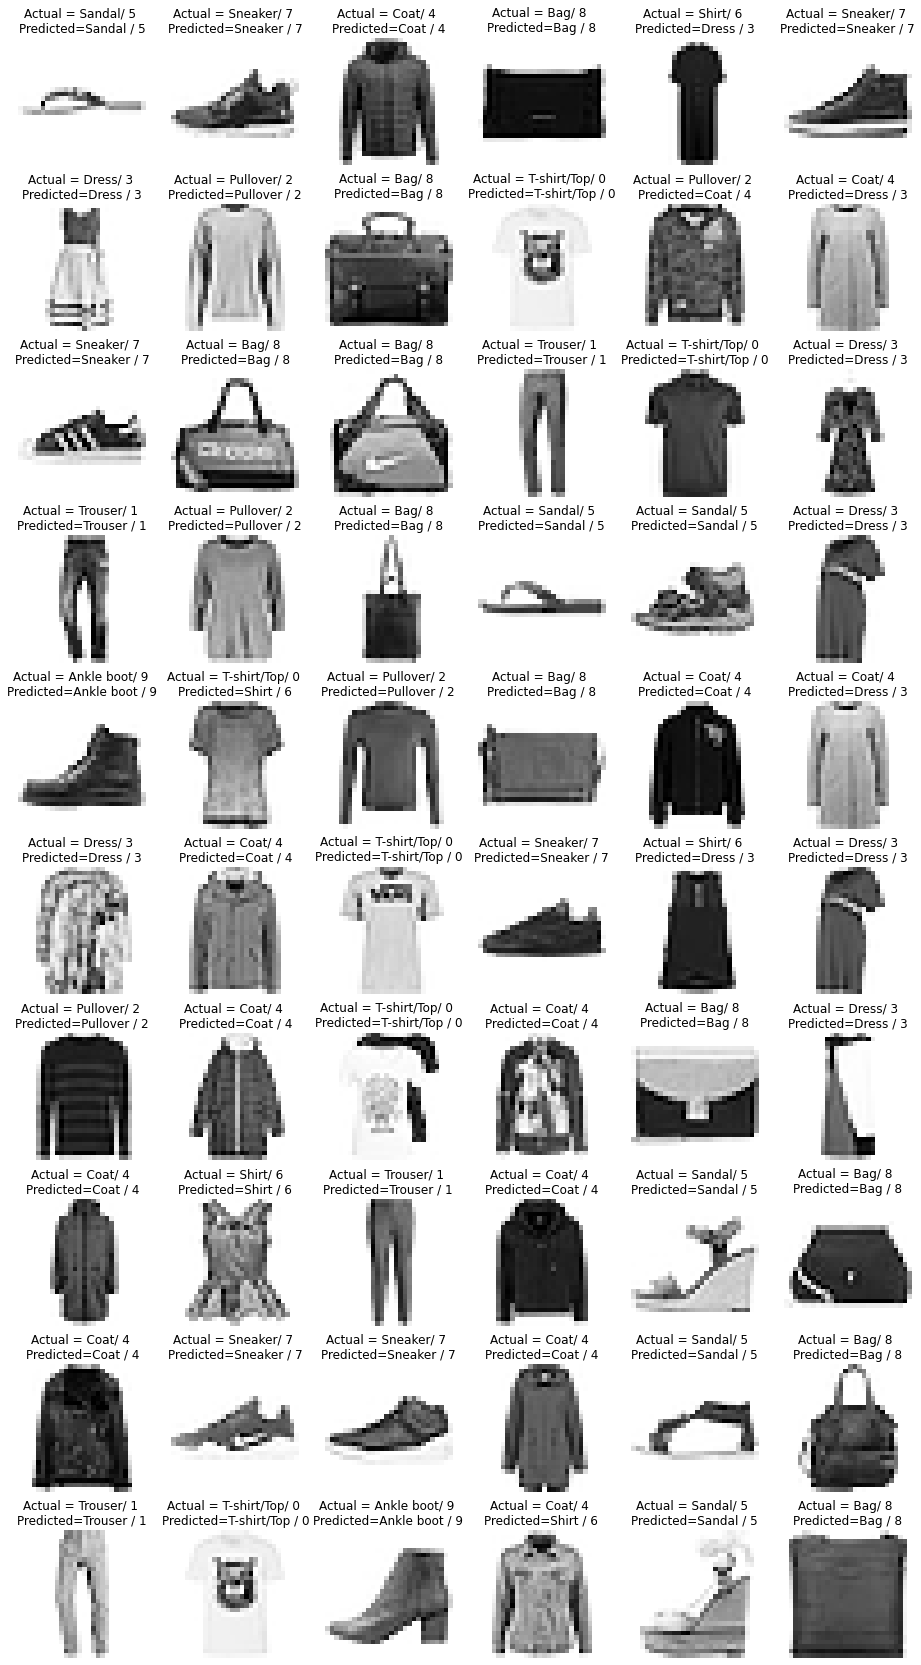

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(test_images[i].reshape(28,28), cmap='Greys' )
  plt.title('Actual = {}/ {} \nPredicted={} / {}'.format(class_labels[test_labels[i]],test_labels[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

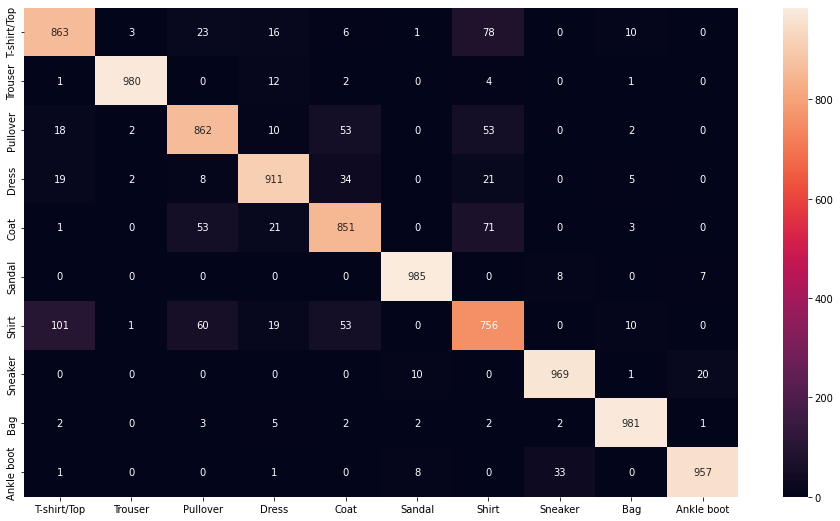

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(test_labels,y_pred_labels)
sns.heatmap(cm,annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels);

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(test_labels, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/Top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.86      0.86      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.76      0.76      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

